In [67]:
import yfinance as yf
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [68]:
# Download the data using pandas_datareader
data = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
table = data[0]
tickers = table['Symbol'].tolist()
print(tickers)

['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ATVI', 'ADM', 'ADBE', 'ADP', 'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AMD', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'AZO', 'AVB', 'AVY', 'BKR', 'BALL', 'BAC', 'BBWI', 'BAX', 'BDX', 'WRB', 'BRK.B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF.B', 'BG', 'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CDAY', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'CV

In [69]:
prices = pd.DataFrame()

In [70]:
tickers_list = tickers[:10] # change this to include all the tickers you want

# Retrieve the closing prices for each ticker
for ticker in tickers_list:
    ticker_data = yf.download(ticker, start="2020-01-01", end="2021-12-31", interval="1d")
    if len(ticker_data) > 0:
        prices[ticker] = ticker_data['Close'] # add the prices to the prices DataFrame
    else:
        print(f"Skipping {ticker}: no data available for the specified date range")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [71]:
prices

,MMM,AOS,ABT,ABBV,ACN,ATVI,ADM,ADBE,ADP,AAP
Date,,,,,,,,,,
2020-01-02,180.000000,47.770000,86.949997,89.550003,210.149994,58.650002,46.110001,334.429993,170.320007,159.410004
2020-01-03,178.449997,47.349998,85.889999,88.699997,209.800003,58.669998,46.020000,331.809998,169.960007,159.419998
2020-01-06,178.619995,47.650002,86.339996,89.400002,208.429993,59.740002,45.660000,333.709991,170.190002,156.800003
2020-01-07,177.899994,47.330002,85.860001,88.889999,203.929993,60.340000,45.110001,333.390015,168.130005,154.940002
2020-01-08,180.630005,47.259998,86.209999,89.519997,204.330002,59.880001,44.610001,337.869995,169.710007,153.160004
...,...,...,...,...,...,...,...,...,...,...
2021-12-23,174.970001,82.769997,139.160004,133.089996,403.309998,65.160004,65.440002,569.619995,242.000000,232.130005
2021-12-27,176.699997,84.699997,141.460007,134.410004,415.329987,65.449997,66.070000,577.679993,246.289993,236.500000
2021-12-28,177.639999,85.540001,140.470001,134.389999,415.269989,66.669998,66.930000,569.359985,246.070007,238.130005


In [72]:
# Save the DataFrame to a CSV file
prices.to_csv('/Users/antoinesfeir/Documents/GitHub/mlResearch/S&P500_ClosingPrices')

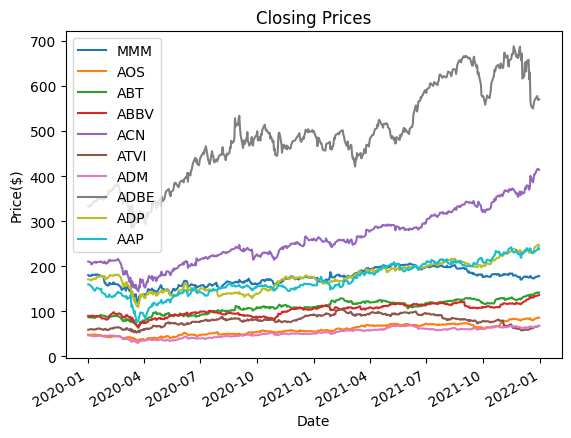

In [73]:
prices.plot()
plt.title("Closing Prices")
plt.ylabel('Price($)')
plt.xlabel('Date')

# Display the plot
plt.show()

Text(0.5, 0, 'Date(days)')

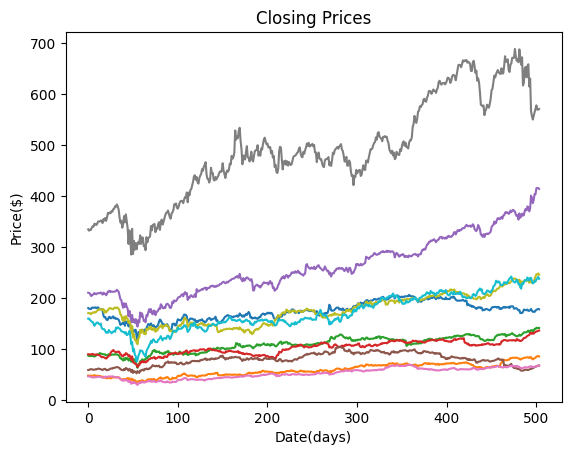

In [74]:
ds = prices.values
plt.plot(ds)
plt.title('Closing Prices')
plt.ylabel('Price($)')
plt.xlabel('Date(days)')

In [75]:
#Using MinMaxScaler for normalizing data between 0 & 1
normalizer = MinMaxScaler(feature_range=(0,1))
ds_scaled = normalizer.fit_transform(np.array(ds).reshape(-1,1))
ds_scaled

array([[0.22864383],
       [0.02800959],
       [0.08745789],
       ...,
       [0.82119994],
       [0.32811884],
       [0.31591965]])

In [76]:
#Defining test and train data sizes
train_size = int(len(ds_scaled)*0.70) # train set is 70%
test_size = len(ds_scaled) - train_size # test is the other 30%

In [77]:
#Splitting data between train and test
ds_train  = ds_scaled[0:train_size,:]
ds_test = ds_scaled[train_size:len(ds_scaled),:]

In [78]:
# shift test for plotting
ds_test = np.concatenate((ds_train, ds_test), axis=0)
ds_test.shape

(5040, 1)

In [79]:
# Reshape the data for LSTM input
def create_ds(dataset, time_steps=1):
    X, y = [], []
    for i in range(len(dataset)-time_steps):
        X.append(dataset[i:i+time_steps, :])
        y.append(dataset[i+time_steps, 0])
    return np.array(X), np.array(y)

In [80]:
time_steps = 60
X_train, y_train = create_ds(ds_train, time_steps)
X_test, y_test = create_ds(ds_test, time_steps)

In [81]:
#Reshaping data to fit into LSTM model
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], X_test.shape[2])

In [82]:
print(ds_train.shape)
print(ds_test.shape)

(3528, 1)
(5040, 1)


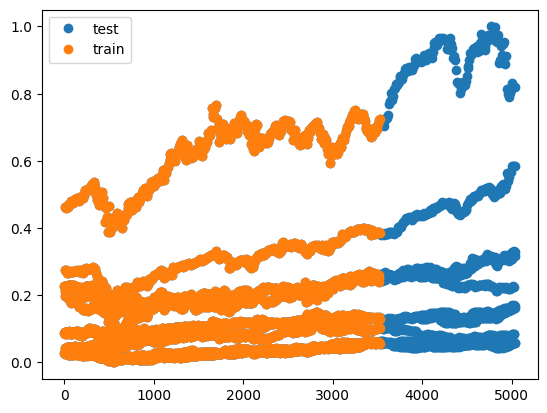

In [83]:
plt.plot(ds_test, 'o', label='test')
plt.plot(ds_train,'o', label='train')
plt.legend()
plt.show()

In [84]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=100))
model.add(Dense(units=1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 100)           40800     
                                                                 
 lstm_5 (LSTM)               (None, 100)               80400     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________


In [85]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
55/55 [==============================] - 7s 78ms/step - loss: 0.0318
Epoch 2/100
55/55 [==============================] - 4s 74ms/step - loss: 0.0283
Epoch 3/100
55/55 [==============================] - 4s 74ms/step - loss: 0.0250
Epoch 4/100
55/55 [==============================] - 4s 74ms/step - loss: 0.0176
Epoch 5/100
55/55 [==============================] - 4s 70ms/step - loss: 0.0165
Epoch 6/100
55/55 [==============================] - 4s 66ms/step - loss: 0.0160
Epoch 7/100
55/55 [==============================] - 4s 67ms/step - loss: 0.0135
Epoch 8/100
55/55 [==============================] - 4s 66ms/step - loss: 0.0119
Epoch 9/100
55/55 [==============================] - 4s 66ms/step - loss: 0.0169
Epoch 10/100
55/55 [==============================] - 4s 68ms/step - loss: 0.0186
Epoch 11/100
55/55 [==============================] - 4s 69ms/step - loss: 0.0169
Epoch 12/100
55/55 [==============================] - 4s 68ms/step - loss: 0.0143
Epoch 13/100
55/55 [=====

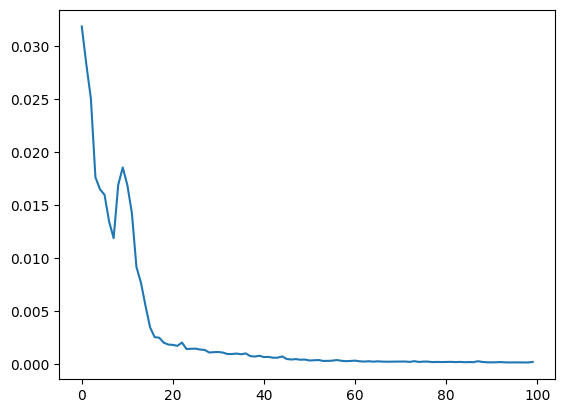

In [86]:
loss = model.history.history['loss']
plt.plot(loss, label='How much we where off from the actual prices')

In [87]:
# Evaluate the model on the test data
model.evaluate(X_test, y_test)
# Make predictions on the test data
y_pred = model.predict(X_test)

156/156 [==============================] - 4s 19ms/step


In [88]:
print(X_test.shape)
print(y_pred.shape)
print(y_test.shape)


(4980, 60, 1)
(4980, 1)
(4980,)


In [89]:
#Predicitng on train and test data
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

156/156 [==============================] - 3s 19ms/step


In [90]:
# Shift test predictions for plotting
test_predict = np.concatenate((train_predict, test_predict), axis=0)
test_predict.shape

(8448, 1)

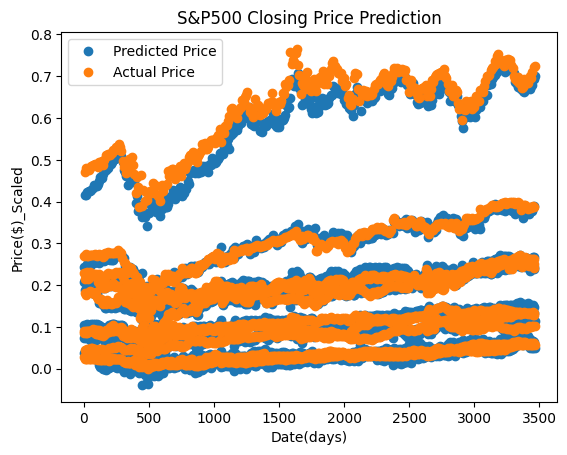

[[0.03815671]
 [0.10434224]
 [0.07316528]
 [0.24451226]
 [0.09741428]
 [0.0306095 ]
 [0.41521308]
 [0.21269575]
 [0.18843555]]


In [91]:
plt.plot(train_predict, 'o', label='Predicted Price')
plt.plot(y_train, 'o', label='Actual Price')
plt.title('S&P500 Closing Price Prediction')
plt.ylabel('Price($)_Scaled')
plt.xlabel('Date(days)')
plt.legend()
plt.show()
print(train_predict[1:10])

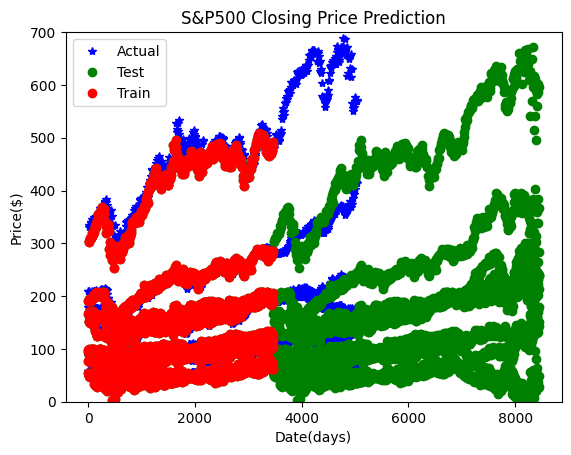

In [92]:
#Comparing using visuals
plt.plot(normalizer.inverse_transform(ds_scaled), 'b*', label="Actual")
plt.plot(normalizer.inverse_transform(test_predict),'go', label="Test")
plt.plot(normalizer.inverse_transform(train_predict), 'ro', label="Train")
plt.ylim(0, 700)
plt.title('S&P500 Closing Price Prediction')
plt.ylabel('Price($)')
plt.xlabel('Date(days)')
plt.legend()
plt.show()

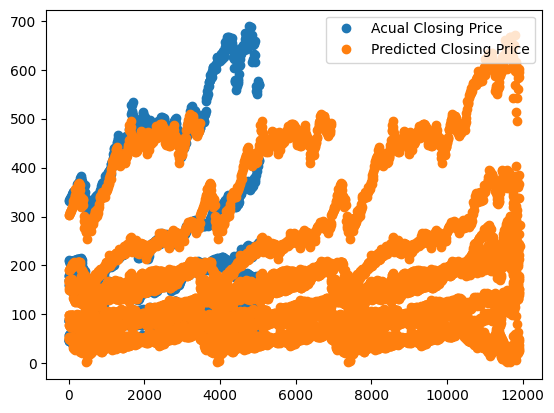

In [93]:
#Combining the predited data to create uniform data visualization
test = np.vstack((train_predict,test_predict))
plt.plot(normalizer.inverse_transform(ds_scaled), 'o', label = "Acual Closing Price")
plt.plot(normalizer.inverse_transform(test),'o', label='Predicted Closing Price')
plt.legend()
plt.show()

In [94]:
#Getting the last 100 days records
last100 = len(ds_test) - 100
fut_inp = ds_test[last100:]
print(len(fut_inp))

100


In [95]:
fut_inp = fut_inp.reshape(1,-1)
tmp_inp = list(fut_inp)

#Creating list of the last 728 data
tmp_inp = tmp_inp[0].tolist()

In [96]:
#Predicting next 30 days price suing the current data
#It will predict in sliding window manner (algorithm) with stride 1
lst_output=[]
n_steps=100
i=0
while(i<30):
    if(len(tmp_inp)>100):
        fut_inp = np.array(tmp_inp[1:])
        fut_inp=fut_inp.reshape(1,-1)
        fut_inp = fut_inp.reshape((1, n_steps, 1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        tmp_inp = tmp_inp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp = fut_inp.reshape((1, n_steps,1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)

print(len(ds_scaled))

[[0.2893809974193573], [0.0884193703532219], [0.12500044703483582], [0.1758439540863037], [0.4350329339504242], [0.17853513360023499], [0.023328179493546486], [0.6393906474113464], [0.48953041434288025], [0.28204187750816345], [0.30859896540641785], [0.10694938898086548], [0.09407833218574524], [0.14199906587600708], [0.3774121105670929], [0.23731446266174316], [0.03206387162208557], [0.3710854947566986], [0.7039855122566223], [0.2769809067249298], [0.24547740817070007], [0.19621536135673523], [0.014531809836626053], [0.16858676075935364], [0.26832735538482666], [0.3352676331996918], [0.0823959931731224], [0.23464056849479675], [0.7674503326416016], [0.34847477078437805]]
5040


In [99]:
temp = len(ds_scaled) - 100

Text(0.5, 1.0, 'Dummy Graph for Testing')

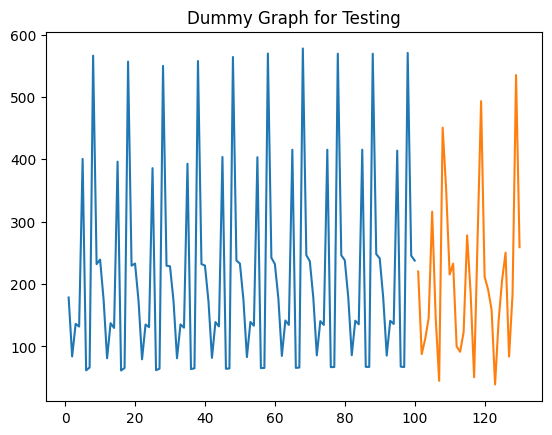

In [100]:
#Creating a dummy plane to plot graph one after another
plot_new=np.arange(1,101)
plot_pred=np.arange(101,131)
plt.plot(plot_new, normalizer.inverse_transform(ds_scaled[temp:]))
plt.plot(plot_pred, normalizer.inverse_transform(lst_output))
plt.title("Dummy Graph for Testing")

In [102]:
ds_new = ds_scaled.tolist()
#Entends helps us to fill the missing value with approx value
ds_new.extend(lst_output)
#Creating final data for plotting
final_graph = normalizer.inverse_transform(ds_new).tolist()

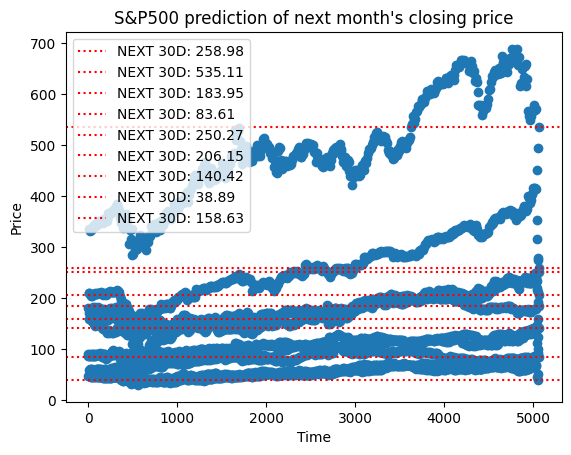

In [108]:
#Plotting final results with predicted value after 30 Days
plt.plot(final_graph, 'o')
plt.ylabel("Price")
plt.xlabel("Time")
plt.title("S&P500 prediction of next month's closing price")
for i in range(1, 10):
    plt.axhline(y=final_graph[len(final_graph)-i], color = 'red', linestyle = ':', label = 'NEXT 30D: {0}'.format(round(float(*final_graph[len(final_graph)-i]),2)))
plt.legend()
plt.show()